In this file I try different techniques to see which performs bet at classifiyng the patients into healty and Parkinson affected ones.

BUT BEFORE
I need to choose the data that will go to the final pipeline, and to do so I need to explore a little bit more the statistics of the training data.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
identities = pd.read_csv('PR-graphomics/database.csv')
identities[:10]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I1519185,75505,PD,M,67,V06,MRI,3D T1,Original,9/23/2021,DCM,NaN
1,I1196712,75484,PD,M,58,BL,MRI,FSPGR 3D SAG,Original,11/08/2018,DCM,NaN
2,I1412792,74817,PD,M,59,BL,MRI,MPRAGE GRAPPA,Original,4/14/2018,DCM,NaN
3,I1003350,70463,PD,M,67,BL,MRI,MPRAGE_GRAPPA,Original,8/31/2017,DCM,NaN
4,I1524690,70188,PD,M,72,V10,MRI,SAG 3D MPRAGE,Original,11/01/2021,DCM,NaN
5,I1362160,59507,PD,M,71,V04,MRI,Sag MPRAGE GRAPPA,Original,9/06/2018,DCM,NaN
6,I1490559,58671,PD,M,72,V10,MRI,SAG 3D MPRAGE,Original,8/09/2021,DCM,NaN
7,I1490541,58510,PD,M,72,V10,MRI,SAG 3D MPRAGE,Original,7/26/2021,DCM,NaN
8,I1490511,57127,PD,M,79,V10,MRI,SAG 3D MPRAGE,Original,8/19/2021,DCM,NaN
9,I1490361,56744,PD,M,60,V10,MRI,SAG 3D MPRAGE,Original,11/12/2020,DCM,NaN


In [3]:
data = pd.read_csv('PR-graphomics/graphomic_features.csv')
data[:10]

,Unnamed: 0,pyGraphomics_version,SimpleITK_version,Numpy_version,Scipy_version,Networkx_version,Skimage_version,Powerlaw_version,Python_version,PipelineName,...,FractalDimension,NodeDensityStatistics,DegreeExponentialFit,DegreePowerlawFit,NodeBetweennessCentrality,NodeClosenessCentrality,NodeClusteringCoefficient,NodeDegreeCentrality,NodeHarmonicCentrality,NodePageRankCentrality
0,I306025,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",pygraphomics_2024-10-04 15:30:27.885190,...,2.428070,{'node_density_average': 1.0370463488911375e-0...,{'degree_exponential_fit_lambda': 0.5002157261...,{'degree_powerlaw_fit_alpha': 2.03735013291944...,{'node_betweenness_average': 0.008143564949405...,{'node_closeness_average': 0.10193583701887146...,{'node_clustering_average': 0.0939033316234688...,"{'node_degree_average': 2.999096657633243, 'no...","{'node_harmonic_average': 132.3977744758458, '...",{'node_pagerank_average': 0.000903342366757000...
1,I395443,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",pygraphomics_2024-10-04 15:30:55.830190,...,2.548184,{'node_density_average': 8.412728458599164e-07...,{'degree_exponential_fit_lambda': 0.4793028683...,{'degree_powerlaw_fit_alpha': 2.04256822309102...,{'node_betweenness_average': 0.004707935647921...,"{'node_closeness_average': 0.132837392214654, ...",{'node_clustering_average': 0.1125896997993091...,"{'node_degree_average': 3.086350974930362, 'no...","{'node_harmonic_average': 217.0035491258111, '...",{'node_pagerank_average': 0.000696378830083565...
2,I340658,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",pygraphomics_2024-10-04 15:31:50.990257,...,2.548958,{'node_density_average': 8.344998929405174e-07...,{'degree_exponential_fit_lambda': 0.4335840478...,{'degree_powerlaw_fit_alpha': 1.97190417503034...,{'node_betweenness_average': 0.003624950818612...,{'node_closeness_average': 0.15353956979235148...,{'node_clustering_average': 0.1210363058584662...,"{'node_degree_average': 3.306380290587492, 'no...","{'node_harmonic_average': 272.6378909740277, '...",{'node_pagerank_average': 0.000631711939355653...
3,I340671,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",pygraphomics_2024-10-04 15:32:24.137617,...,2.562196,"{'node_density_average': 8.77386807889318e-07,...",{'degree_exponential_fit_lambda': 0.4357583402...,{'degree_powerlaw_fit_alpha': 1.96358910660553...,{'node_betweenness_average': 0.004505631223727...,{'node_closeness_average': 0.12969355294025392...,{'node_clustering_average': 0.1268821890877134...,"{'node_degree_average': 3.2948128693368353, 'n...","{'node_harmonic_average': 224.9835229935342, '...",{'node_pagerank_average': 0.000656598818122127...
4,I466899,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",pygraphomics_2024-10-04 15:32:46.802618,...,2.585787,{'node_density_average': 8.606328754149704e-07...,{'degree_exponential_fit_lambda': 0.4681940514...,{'degree_powerlaw_fit_alpha': 2.04457117682368...,{'node_betweenness_average': 0.004534890657300...,"{'node_closeness_average': 0.1608952323736101,...",{'node_clustering_average': 0.1330372019993313...,"{'node_degree_average': 3.1358024691358026, 'n...","{'node_harmonic_average': 224.0478826177981, '...",{'node_pagerank_average': 0.000823045267489711...
5,I812608,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",pygraphomics_2024-10-04 15:33:12.696615,...,2.583853,{'node_density_average': 1.0285944498094144e-0...,{'degree_exponential_fit_lambda': 0.4563156674...,{'degree_powerlaw_fit_alpha': 2.06611183923934...,{'node_betweenness_average': 0.003676604050670...,{'node_closeness_average': 0.22056912799385353...,{'node_clustering_average': 0.1646807291802012...,"{'node_degree_average': 3.1913214990138066, 'n...","{'node_harmonic_average': 245.270114435202, 'n...",{'

In [4]:

list(data.columns)[14:]

['EulerNumber',
 'ModularityScore',
 'NumberOfConnectedComponents',
 'NumberOfEdges',
 'NumberOfIsolatedNodes',
 'NumberOfMaximalCliques',
 'NumberOfNodes',
 'NumberOfPendantNodes',
 'SelfLinks',
 'AverageShortestPathLength',
 'CenterOfMass',
 'DistanceMostCentralNodes',
 'DistanceNoPendantNodes',
 'DistancePendantNodes',
 'Eccentricity',
 'FractalDimension',
 'NodeDensityStatistics',
 'DegreeExponentialFit',
 'DegreePowerlawFit',
 'NodeBetweennessCentrality',
 'NodeClosenessCentrality',
 'NodeClusteringCoefficient',
 'NodeDegreeCentrality',
 'NodeHarmonicCentrality',
 'NodePageRankCentrality']

In [5]:
#Check if the order is correct
data_IDs = data['Unnamed: 0']
identities_IDs = identities['Image Data ID']

for i in identities_IDs:
    if i in list(data_IDs):
        continue
    else:
        print('No match found for identity ID: ', i)
        break


for i in data_IDs:
    if i in list(identities_IDs):
        continue
    else:
        print('No match found for data ID: ', i)
        break

data.insert(0, 'Image Data ID', data['Unnamed: 0'])

In [6]:

complete_data =  pd.merge(data, identities, on='Image Data ID')

complete_data.to_csv('PR-graphomics/complete_database.csv')

list(complete_data.columns)

['Image Data ID',
 'Unnamed: 0',
 'pyGraphomics_version',
 'SimpleITK_version',
 'Numpy_version',
 'Scipy_version',
 'Networkx_version',
 'Skimage_version',
 'Powerlaw_version',
 'Python_version',
 'PipelineName',
 'PipelineDescription',
 'PipelineVersion',
 'WeightedGraph',
 'EdgeWeights',
 'EulerNumber',
 'ModularityScore',
 'NumberOfConnectedComponents',
 'NumberOfEdges',
 'NumberOfIsolatedNodes',
 'NumberOfMaximalCliques',
 'NumberOfNodes',
 'NumberOfPendantNodes',
 'SelfLinks',
 'AverageShortestPathLength',
 'CenterOfMass',
 'DistanceMostCentralNodes',
 'DistanceNoPendantNodes',
 'DistancePendantNodes',
 'Eccentricity',
 'FractalDimension',
 'NodeDensityStatistics',
 'DegreeExponentialFit',
 'DegreePowerlawFit',
 'NodeBetweennessCentrality',
 'NodeClosenessCentrality',
 'NodeClusteringCoefficient',
 'NodeDegreeCentrality',
 'NodeHarmonicCentrality',
 'NodePageRankCentrality',
 'Subject',
 'Group',
 'Sex',
 'Age',
 'Visit',
 'Modality',
 'Description',
 'Type',
 'Acq Date',
 'Forma

In [8]:

import ast 

def expand_dict_columns_auto(df):
    """
    Automatically detects and expands columns containing dictionaries stored as strings into separate columns.
    
    Parameters:
    - df: The original DataFrame.

    Returns:
    - A new DataFrame with expanded dictionary columns.
    """
    df_expanded = df.copy()  # Create a copy to avoid modifying the original DataFrame

    # Identify columns that are dictionaries or look like dictionaries (stored as strings)
    dict_columns = [
        col for col in df.columns 
        if isinstance(df[col].iloc[0], dict) or (isinstance(df[col].iloc[0], str) and df[col].iloc[0].startswith("{"))
    ]
    
    for col in dict_columns:
        # If the column contains strings, convert them to dictionaries
        if isinstance(df[col].iloc[0], str):
            df_expanded[col] = df_expanded[col].apply(ast.literal_eval)
        
        # Expand the dictionary in the column into separate columns
        expanded_cols = pd.json_normalize(df_expanded[col])
        
        # Rename columns to include the original column name as a prefix
        expanded_cols.columns = [f"{col}_{subcol}" for subcol in expanded_cols.columns]
        
        # Drop the original dictionary column and concatenate the new expanded columns
        df_expanded = pd.concat([df_expanded.drop(columns=[col]), expanded_cols], axis=1)
    
    return df_expanded

# Example usage
data = {
    'ID': [1, 2, 3],
    'Info': [
        "{'node_clustering_average': 0.09390333162346888, 'node_clustering_median': 0.0, 'node_clustering_std': 0.217171784572435, 'node_clustering_min': 0.0, 'node_clustering_max': 1.0}",
        "{'node_clustering_average': 0.105, 'node_clustering_median': 0.1, 'node_clustering_std': 0.3, 'node_clustering_min': 0.0, 'node_clustering_max': 1.0}",
        "{'node_clustering_average': 0.089, 'node_clustering_median': 0.05, 'node_clustering_std': 0.2, 'node_clustering_min': 0.0, 'node_clustering_max': 1.0}"
    ],
    'Value': [100, 200, 300]
}
df = pd.DataFrame(data)

# Expand columns containing dictionaries (even if stored as strings)
df_expanded = expand_dict_columns_auto(df)
df_expanded

,ID,Value,Info_node_clustering_average,Info_node_clustering_median,Info_node_clustering_std,Info_node_clustering_min,Info_node_clustering_max
0,1,100,0.093903,0.00,0.217172,0.0,1.0
1,2,200,0.105000,0.10,0.300000,0.0,1.0
2,3,300,0.089000,0.05,0.200000,0.0,1.0


In [9]:
useful_data = complete_data[['EulerNumber',
 'ModularityScore',
 'NumberOfConnectedComponents',
 'NumberOfEdges',
 'NumberOfIsolatedNodes',
 'NumberOfMaximalCliques',
 'NumberOfNodes',
 'NumberOfPendantNodes',
 'SelfLinks',
 'AverageShortestPathLength',
 'CenterOfMass',
 'DistanceMostCentralNodes',
 'DistanceNoPendantNodes',
 'DistancePendantNodes',
 'Eccentricity',
 'FractalDimension',
 'NodeDensityStatistics',
 'DegreeExponentialFit',
 'DegreePowerlawFit',
 'NodeBetweennessCentrality',
 'NodeClosenessCentrality',
 'NodeClusteringCoefficient',
 'NodeDegreeCentrality',
 'NodeHarmonicCentrality',
 'NodePageRankCentrality',
 'Group']]

expanded_data = expand_dict_columns_auto(useful_data)


if len(list(useful_data.columns)) == len(list(expanded_data.columns)):
    print('something went wrong: coumns are not expanded!')
elif len(list(useful_data.columns)) > len(list(expanded_data.columns)):
    print('something went VERY wrong: coumns are lost!')
else:
    print('The original number of columns is ', len(list(useful_data.columns)), ' and the new number is ', len(list(expanded_data.columns)))


#list(expanded_data.columns)[:20]


def drop_constant_columns(df):
    """
    Drops columns from a DataFrame where all values are the same.
    
    Parameters:
    - df: The original DataFrame.

    Returns:
    - A new DataFrame with constant columns removed.
    """
    # Filter out columns where all values are the same
    non_constant_df = df.loc[:, df.apply(lambda col: col.nunique() > 1)]
    return non_constant_df


filtered_data =  drop_constant_columns(expanded_data)
print('The reduced number of columns is ', len(list(filtered_data.columns)),
       ' and the new number is ', len(list(expanded_data.columns)))

filtered_data.to_csv('PR-graphomics/expanded_graphomics.csv')

difference = list(set(list(expanded_data.columns)) - set(list(filtered_data.columns)))
print('Columns deleted: ',difference)



The original number of columns is  26  and the new number is  74
The reduced number of columns is  68  and the new number is  74
Columns deleted:  ['NodeDegreeCentrality_node_degree_min', 'NumberOfIsolatedNodes', 'NodeBetweennessCentrality_node_betweenness_min', 'NodeClusteringCoefficient_node_clustering_min', 'NodeClusteringCoefficient_node_clustering_max', 'NodeClusteringCoefficient_node_clustering_median']


In [11]:

def drop_columns_containing_string(df, substring):
    """
    Removes columns from a DataFrame if the column name contains a specified substring.
    
    Parameters:
    - df: The original DataFrame.
    - substring: The substring to search for in column names.

    Returns:
    - A new DataFrame with specified columns removed.
    """
    # Filter out columns that contain the substring in their names
    filtered_df = df.loc[:, ~df.columns.str.contains(substring)]
    return filtered_df


reduced_data = drop_columns_containing_string(filtered_data, '_min')
reduced_data = drop_columns_containing_string(reduced_data, '_max')
reduced_data = drop_columns_containing_string(reduced_data, '_median')
reduced_data = drop_columns_containing_string(reduced_data, '_std')


print('The reduced number of columns is ', len(list(reduced_data.columns)),
       ' and the new number is ', len(list(filtered_data.columns)))

difference = list(set(list(filtered_data.columns)) - set(list(reduced_data.columns)))
print('Columns deleted: ',difference)

reduced_data.to_csv('PR-graphomics/reduced_graphomics.csv')

The reduced number of columns is  29  and the new number is  68
Columns deleted:  ['NodeHarmonicCentrality_node_harmonic_min', 'NodeDensityStatistics_node_density_min', 'NodeClosenessCentrality_node_closeness_median', 'NodeDegreeCentrality_node_degree_max', 'DistanceNoPendantNodes_node_no_pendant_distance_std', 'DistanceNoPendantNodes_node_no_pendant_distance_max', 'DistancePendantNodes_node_pendant_distance_max', 'DistancePendantNodes_node_pendant_distance_std', 'NodeClusteringCoefficient_node_clustering_std', 'NodeClosenessCentrality_node_closeness_max', 'DistanceMostCentralNodes_node_top10_distance_median', 'NodeDegreeCentrality_node_degree_median', 'NodeDensityStatistics_node_density_max', 'NodeDensityStatistics_node_density_std', 'NodePageRankCentrality_node_pagerank_min', 'DistanceNoPendantNodes_node_no_pendant_distance_median', 'NodeDensityStatistics_node_density_median', 'NodeBetweennessCentrality_node_betweenness_std', 'Eccentricity_node_eccentricity_std', 'DistanceMostCentral

In [12]:
list(reduced_data.columns)

['EulerNumber',
 'ModularityScore',
 'NumberOfConnectedComponents',
 'NumberOfEdges',
 'NumberOfMaximalCliques',
 'NumberOfNodes',
 'NumberOfPendantNodes',
 'SelfLinks',
 'AverageShortestPathLength',
 'FractalDimension',
 'Group',
 'CenterOfMass_cdm_x',
 'CenterOfMass_cdm_y',
 'CenterOfMass_cdm_z',
 'DistanceMostCentralNodes_node_top10_distance_average',
 'DistanceNoPendantNodes_node_no_pendant_distance_average',
 'DistancePendantNodes_node_pendant_distance_average',
 'Eccentricity_node_eccentricity_average',
 'NodeDensityStatistics_node_density_average',
 'DegreeExponentialFit_degree_exponential_fit_lambda',
 'DegreeExponentialFit_degree_exponential_fit_KS',
 'DegreePowerlawFit_degree_powerlaw_fit_alpha',
 'DegreePowerlawFit_degree_powerlaw_fit_KS',
 'NodeBetweennessCentrality_node_betweenness_average',
 'NodeClosenessCentrality_node_closeness_average',
 'NodeClusteringCoefficient_node_clustering_average',
 'NodeDegreeCentrality_node_degree_average',
 'NodeHarmonicCentrality_node_harm

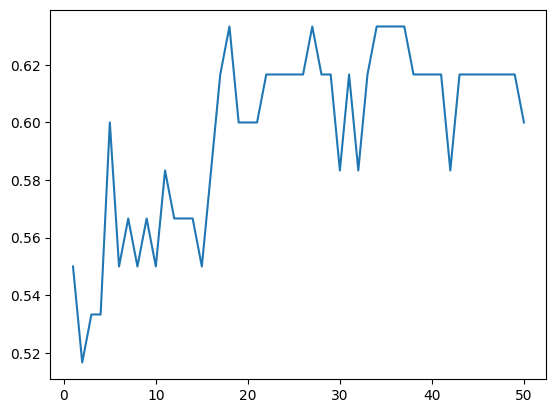

Accuracy: 0.57, with number of neighbors 18

Classification Report:
              precision    recall  f1-score   support

          PD       0.58      0.63      0.60        30
   Prodromal       0.59      0.53      0.56        30

    accuracy                           0.58        60
   macro avg       0.58      0.58      0.58        60
weighted avg       0.58      0.58      0.58        60



In [15]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = pd.DataFrame.copy(reduced_data)
y = X.pop('Group')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_cont, y_test, y_cont = train_test_split(X_test, y_test, test_size=.5, random_state=42)
# Initialize the KNN classifier with k=5
nearest_neighbors = np.arange(1, 51)
accuracies = []
for nn in nearest_neighbors:
    knn = KNeighborsClassifier(n_neighbors=nn)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy and print a classification report
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    #print(f"Accuracy: {accuracy:.2f}, with number of neighbors {nn}")

#shows the results of spanning the various values of nn
plt.plot(nearest_neighbors, accuracies)
plt.show()

nn = nearest_neighbors[np.argmax(np.array(accuracies))]
knn = KNeighborsClassifier(n_neighbors=nn)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_cont)

accuracy = accuracy_score(y_cont, y_pred)
print(f"Accuracy: {accuracy:.2f}, with number of neighbors {nn}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X = pd.DataFrame.copy(reduced_data)
y = X.pop('Group')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42, min_samples_split= 2)

# Train the Decision Tree model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split= 2)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = random_forest.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Evaluate the Random Forest model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Random Forest Accuracy: {accuracy_forest:.2f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

Decision Tree Accuracy: 0.44

Decision Tree Classification Report:
              precision    recall  f1-score   support

          PD       0.48      0.48      0.48        48
   Prodromal       0.40      0.40      0.40        42

    accuracy                           0.44        90
   macro avg       0.44      0.44      0.44        90
weighted avg       0.44      0.44      0.44        90

Random Forest Accuracy: 0.60

Random Forest Classification Report:
              precision    recall  f1-score   support

          PD       0.62      0.65      0.63        48
   Prodromal       0.57      0.55      0.56        42

    accuracy                           0.60        90
   macro avg       0.60      0.60      0.60        90
weighted avg       0.60      0.60      0.60        90



In [12]:
#divide the dataset into PD and control

Parkinsons = complete_data[complete_data['Group'] == 'PD']
Healthy = complete_data[complete_data['Group'] != 'PD']

Healthy

,Image Data ID,Unnamed: 0,pyGraphomics_version,SimpleITK_version,Numpy_version,Scipy_version,Networkx_version,Skimage_version,Powerlaw_version,Python_version,...,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
104,I1658765,I1658765,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",...,Prodromal,M,54,V10,MRI,MPRAGE_,Original,11/29/2022,DCM,NaN
111,I1602906,I1602906,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",...,Prodromal,M,69,V10,MRI,MPRAGE SAG IPAT ISO,Original,5/05/2022,DCM,NaN
112,I1119726,I1119726,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",...,Prodromal,M,47,BL,MRI,MPRAGE_ASO,Original,3/20/2018,DCM,NaN
113,I1124060,I1124060,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",...,Prodromal,M,73,V06,MRI,MPRAGE ADNI,Original,4/25/2018,DCM,NaN
119,I757836,I757836,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",...,Prodromal,M,58,V06,MRI,Sag MPRAGE GRAPPA,Original,6/13/2016,DCM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,I1660587,I1660587,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",...,Prodromal,M,69,V10,MRI,3D T1-weighted,Original,11/15/2022,DCM,NaN
296,I497279,I497279,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",...,Prodromal,M,67,BL,MRI,MPRAGE_GRAPPA_ADNI,Original,4/15/2015,DCM,NaN
297,I951927,I951927,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",...,Prodromal,M,66,V06,MRI,MPRAGE_GRAPPA_ADNI,Original,2/08/2017,DCM,NaN
298,I440699,I440699,0.0.1,2.2.1,1.26.4,1.13.1,3.1,0.19.3,1.5,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:...",...,Prodromal,M,83,BL,MRI,sag mprage,Original,9/11/2013,DCM,NaN


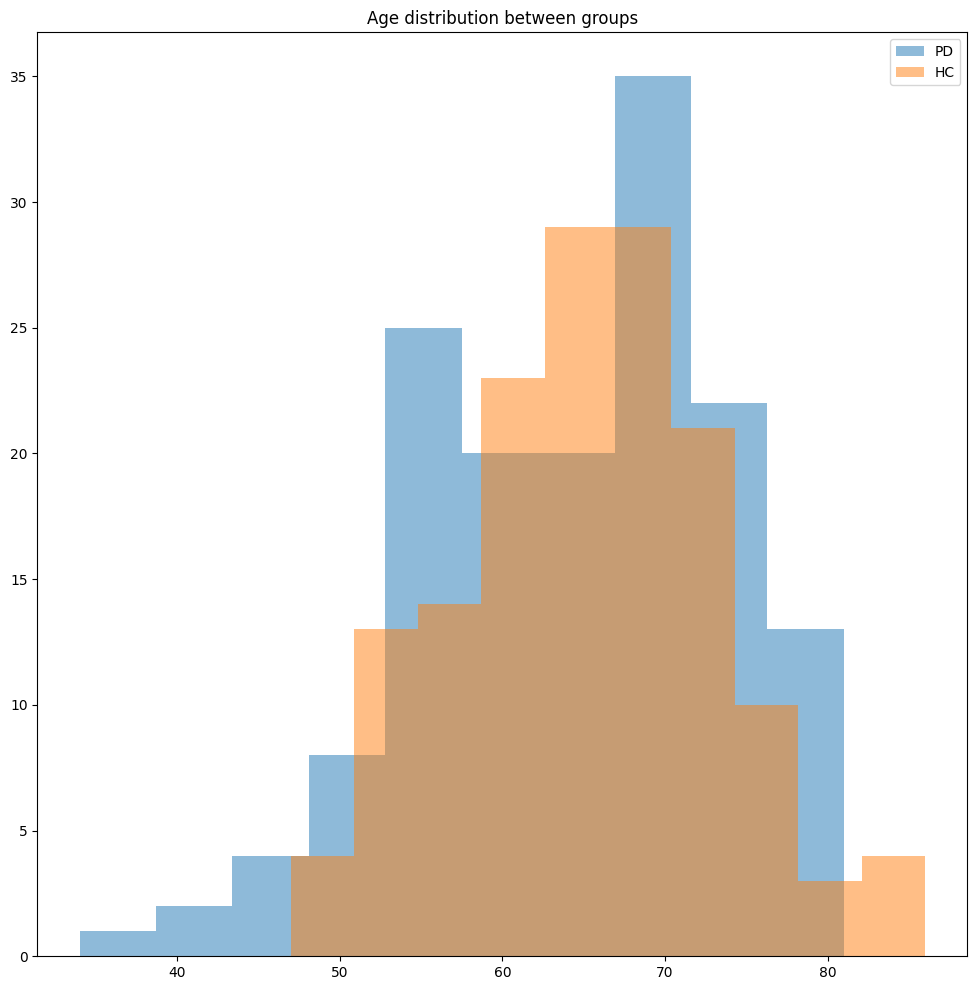

In [95]:
plt.figure(figsize=(12, 12))

plt.title('Age distribution between groups')
plt.hist(Parkinsons['Age'], alpha = 0.5, label='PD')
plt.hist(Healthy['Age'], alpha = 0.5, label='HC')
plt.legend()
plt.show()


Correlations with 'Group_Prodromal':
EulerNumber                                    -0.159409
ModularityScore                                 0.017095
NumberOfConnectedComponents                     0.039426
NumberOfEdges                                   0.106249
NumberOfIsolatedNodes                                NaN
                                                  ...   
NodePageRankCentrality_node_pagerank_average   -0.120519
NodePageRankCentrality_node_pagerank_median    -0.122104
NodePageRankCentrality_node_pagerank_std       -0.086899
NodePageRankCentrality_node_pagerank_min       -0.133724
NodePageRankCentrality_node_pagerank_max       -0.040556
Name: Group_Prodromal, Length: 73, dtype: float64


<AxesSubplot: >

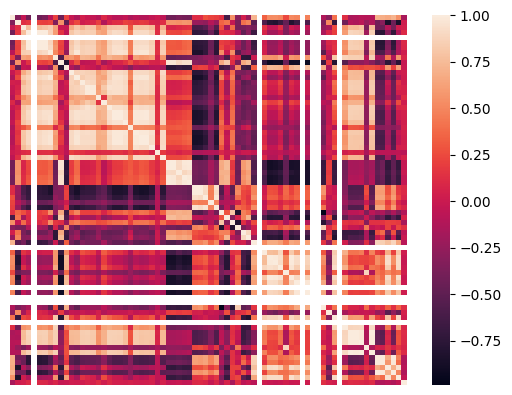

In [108]:

def analyze_correlation(df, target_column):
    """
    Analyzes the correlation between all columns in a DataFrame, with a focus on a target column.
    Categorical columns are one-hot encoded before calculating correlations.
    
    Parameters:
    - df: The DataFrame containing the data.
    - target_column: The name of the column of interest to check correlations against.
    
    Returns:
    - A correlation matrix for the entire DataFrame.
    - A dictionary of correlations between each one-hot-encoded target column (if applicable) and all other columns.
    """
    # One-hot encode categorical columns
    df_encoded = pd.get_dummies(df, drop_first=True)
    
    # Calculate the full correlation matrix for the encoded DataFrame
    correlation_matrix = df_encoded.corr()
    #print("Full Correlation Matrix:")
    #print(correlation_matrix)
    
    # Initialize a dictionary to store correlations for each target-related column
    target_correlations = {}
    
    # Check if the target column was one-hot encoded
    target_columns = [col for col in df_encoded.columns if col.startswith(target_column)]
    
    # If the target column was one-hot encoded, calculate correlation for each resulting column
    if target_columns:
        for target_col in target_columns:
            target_corr = correlation_matrix[target_col].drop(target_columns)
            target_correlations[target_col] = target_corr
            print(f"\nCorrelations with '{target_col}':")
            print(target_corr)
    else:
        # If not one-hot encoded, use the target column directly
        target_corr = correlation_matrix[target_column].drop(target_column)
        target_correlations[target_column] = target_corr
        print(f"\nCorrelations with '{target_column}':")
        print(target_corr)
    
    return correlation_matrix, target_correlations


corr_matrix, group_corr = analyze_correlation(expanded_data, 'Group')

import seaborn

seaborn.heatmap(corr_matrix, yticklabels=False, xticklabels=False)
